In [1]:
import numpy as np

# read data
data = np.genfromtxt("pima-indians-diabetes-imbalanced.csv", delimiter=',', dtype=None, encoding = 'UTF-8', names=True)

# inital import test
data.shape

(768,)

### Reshape

In [2]:
x1 = np.reshape(data["Pedigree_fun"],(-1,1))
x2 = np.reshape(data["Age"],(-1,1))
x3 = np.reshape(data["BMI"],(-1,1))
x4 = np.reshape(data["Plasma_glucose"],(-1,1))
x5 = np.reshape(data["No_pregnancies"],(-1,1))

y = data["Diabetes"]

X = np.concatenate((x1,x2,x3,x4,x5),axis=1)

### Normalize the predictor variables (Min-max)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# could use fit_transform == fit().transform()
# find MIN and MAX value in each cloumn of array X.  we apply the calculations that we have calculated in fit() to every data point
# calulates "unit variance".  Learns something about the data
scaler.fit(X) 

# rescale or transform.  Applies the min-max scaling normalization to all values
# use what it learned
norm_X = scaler.transform(X)
norm_X.shape

(768, 5)

### Transform 

In [4]:
X_trans = scaler.transform(X)

# Validate
# X_trans[:10,:]

In [5]:
metrics = lambda y_test, y_pred:(
        accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)
    )

### ANN Modeling

In [6]:
import sklearn.neural_network as ann
import csv
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

"""
loops through models and evaluates on layers 1,2,3 from 1-25 neurons
"""
def generate_results(file, XTrain, yTrain):
    layer01_max = 25
    layer02_max = 25
    layer03_max = 25

    filename = file
    X_train = XTrain
    y_train = yTrain

    max_iteratons = 4000

    with open(filename, 'w') as csvfile:
        # my headers
        headerList = ['hidden layer 1','hidden layer 2','hidden layer 3', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        csvwriter = csv.writer(csvfile, dialect='excel')
        csvwriter.writerow(headerList)
        i=j=k=1
        while i < layer01_max:
            ann_model0 = ann.MLPClassifier((i), activation = 'logistic', max_iter = max_iteratons)
            ann_model0.fit(X_train, y_train)
            y_pred = ann_model0.predict(X_test)
            #print("i- ",i)

            arr1 = [i,0,0]
            met_array = np.array(metrics(y_test, y_pred))
            arr1.extend(met_array)

            csvwriter.writerow(arr1)
            i+=1
            #print(arr1)
        while j < layer02_max:
            ann_modelj = ann.MLPClassifier((i,j), activation = 'logistic', max_iter = max_iteratons)
            ann_modelj.fit(X_train, y_train)
            y_predj = ann_modelj.predict(X_test)
            #print("j - ",i,j)

            arr1 = [i,j,0]
            met_array = np.array(metrics(y_test, y_pred))
            arr1.extend(met_array)

            csvwriter.writerow(arr1)
            j+=1
            #print(arr1)
        while k < layer03_max:
            ann_modelk = ann.MLPClassifier((i,j,k), activation = 'logistic', max_iter = max_iteratons)
            ann_modelk.fit(X_train, y_train)
            y_predk = ann_modelk.predict(X_test)

            #print("k- ",i,j,k)
            arr1 = [i,j,k]
            met_array = np.array(metrics(y_test, y_pred))
            arr1.extend(met_array)
            csvwriter.writerow(arr1)
            k+=1
            #print(arr1) 

### Train Split

In [7]:
# split data into train and test
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts (X_trans, y, random_state=0, test_size=0.3)

generate_results("pima-imbalanced-results.csv", X_train, y_train)

C:\Users\kabus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kabus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Run with best values from generated csv

In [23]:
import sklearn.neural_network as ann
import csv
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

ann_model0 = ann.MLPClassifier((17), activation = 'logistic', max_iter = 4000)
ann_model0.fit(X_train, y_train)
y_pred = ann_model0.predict(X_test)

print("accuracy_score: ",accuracy_score(y_test, y_pred))
print ("precision_score: ", precision_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred)) 

accuracy_score:  0.7619047619047619
precision_score:  0.6727272727272727
recall_score: 0.5
f1_score 0.5736434108527131


### ROC curve

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

y_pred_proba = ann_model0.predict_proba(X_test)


In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, cut_offs = roc_curve(y_test, y_pred_proba[:,1])

### Plot ROC Curve

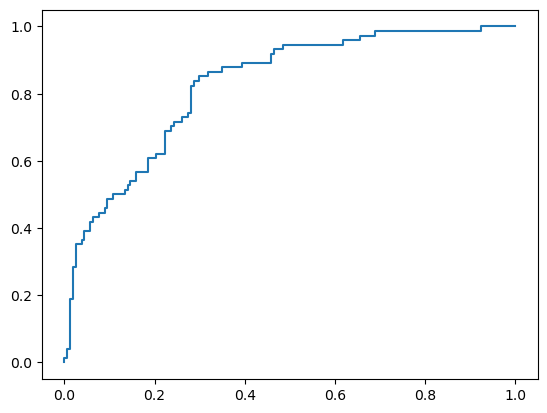

In [26]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

### Area under the Curve

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6926751592356688

### Look at Undersample first

In [41]:
from imblearn.under_sampling import RandomUnderSampler as rus

#I'm the model
rus_model = rus(random_state=0)

rus_model.fit(X_train, y_train)
X_train_rus, y_train_rus = rus_model.fit_sample(X_train, y_train)

generate_results("pima-undersample-results.csv", X_train_rus, y_train_rus)

C:\Users\kabus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Look at Oversample now

In [14]:
from imblearn.over_sampling import RandomOverSampler as ros
ros_model = ros(random_state=0)

ros_model.fit(X_train, y_train)
X_train_ros, y_train_ros = ros_model.fit_sample(X_train, y_train)
generate_results("pima-oversample-results.csv", X_train_ros, y_train_ros)

C:\Users\kabus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### I'll move forward with UNDERSAMPLED

In [31]:
import sklearn.neural_network as ann
import csv
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

ann_model_rus = ann.MLPClassifier((10), activation = 'logistic', max_iter = 4000)
ann_model_rus.fit(X_train_rus, y_train_rus)
y_pred = ann_model_rus.predict(X_test)

print("accuracy_score: ",accuracy_score(y_test, y_pred))
print ("precision_score: ", precision_score(y_test, y_pred))
print("recall_score:", recall_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred)) 

accuracy_score:  0.7402597402597403
precision_score:  0.5795454545454546
recall_score: 0.6891891891891891
f1_score 0.6296296296296297


### Create the curve

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

y_pred_proba = ann_model_rus.predict_proba(X_test)

### Area under the Curve

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.726760199690136

In [39]:
#using roc_curve function for calculating tpr and fpr for different cut-off points
from sklearn.metrics import roc_curve
fpr, tpr, cut_offs = roc_curve(y_test, y_pred_proba[:,1]) 

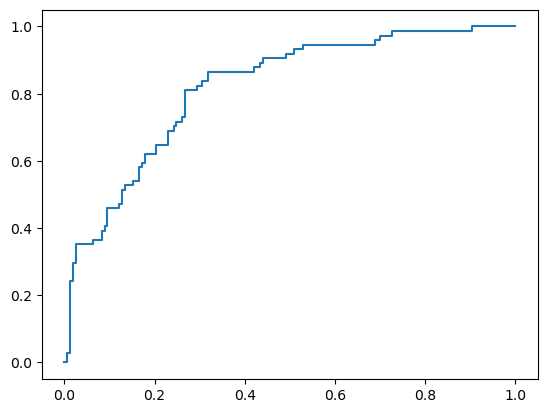

In [40]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()

Both models performed moderatly at predicting diabetes.  Although I didn't run analytics, I suspect both models are not significanly different.  However, there is a difference we'll look at the area under the curve. The Undersampled ROC_AUC was greater at 73% compared to the Imbalanced ROC_AUC was 69%.
The Imbalanced had a F1 score of 53% which tells me the balance or harmony is not that good.  Wile the Undersampled F1 at 63% is better and so is the recall at 58% ( a little improvement over 5%). The recall all of the Correct/(FalseNegatives + Correct).  The Undersampled suffered in precision, shich tells me that it had more false positives than the Imbalanced.


Here is the Imbalanced metrics:
accuracy_score:  0.7619047619047619
precision_score:  0.6727272727272727
recall_score: 0.5
f1_score 0.5736434108527131
roc: 0.6926751592356688

Undersampled metrics
accuracy_score:  0.7402597402597403
precision_score:  0.5795454545454546
recall_score: 0.6891891891891891
f1_score 0.6296296296296297
roc : 0.726760199690136